# Your info

Full name: Ghazal ZamaniNejad

Student ID: 97522166

# Q1. Perceptron

In [14]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

class StochasticGradientDescent:
  input_count = 0
  def __init__(self, dataSet, learning_rate, max_deltaW):
    self.dataSet = dataSet
    # rows of dataset count
    self.input_count = dataSet.shape[1]
    self.learning_rate = learning_rate
    self.max_deltaW = max_deltaW
    #define randomly initialized weights
    self.weights = np.random.rand(1, self.input_count+1)[0]

  #desired is nor
  def desired(self, x): return -1 if (1 in x[1:]) else 1

  def error(self, x, w): 
    d = self.desired(x)
    return d - np.dot(x, w)

  def iterations(self):
    deltaW = float("inf")
    count = 0

    #iterate on all datas while max change in weights is more than small number given
    while deltaW > self.max_deltaW :
      index = count % self.dataSet.shape[0]
      biased_data = np.insert(self.dataSet[index], 0, 1) 
      e = self.error(biased_data, self.weights)
      add_term = (self.learning_rate * e) * (biased_data)
      np.add(add_term, self.weights, self.weights)
      deltaW = np.max(np.abs(add_term))
      count += 1
      self.learning_rate *= 0.999

    return count


In [16]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

data = np.array([[-1, -1],
                 [-1, 1], 
                 [1, -1],
                 [1, 1]])

gd = StochasticGradientDescent(data, 0.3, 0.0001) #(n, eta, small number)
i = gd.iterations()
print("Learning is done in ", i, " itetation.")
print("Weights are: ", gd.weights)


Learning is done in  7311  itetation.
Weights are:  [-0.50009994 -0.50004997 -0.50000005]


# Q2. Binary Classification

In [17]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.axis as ax

In [18]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.

class StochasticGradientDescent:
  input_count = 0
  def __init__(self, biased_data, desired, learning_rate, max_deltaW):
    self.biased_data = biased_data
    self.desired = desired
    self.input_count = biased_data.shape[1]
    self.learning_rate = learning_rate
    self.max_deltaW = max_deltaW
    #define randomly initialized weights
    self.weights = np.random.rand(1, self.input_count)[0]

  def error(self, x, w, d): return d - np.dot(x, w)

  def E(self, e): return 0.5 * (e**2)


  def iterations(self):
    err_per_iteration = []
    deltaW = float("inf")
    count = 0

    #iterate on all datas while max change in weights is more than small number given
    while deltaW > self.max_deltaW :
    # while count < 100:
      index = count % self.biased_data.shape[0]
      e = self.error(biased_data[index], self.weights, desired[index]) 
      tmp = np.copy(self.weights)
      add_term = (self.learning_rate * e) * (biased_data[index]) 
      np.add(add_term, self.weights, self.weights)
      min_weight = np.min(np.abs(self.weights))
      np.divide(self.weights, min_weight, self.weights)
      # deltaW = np.max(np.abs(add_term))
      deltaW = np.max(np.abs(np.subtract(self.weights, tmp)))
      #print("deltaW", deltaW)
      self.learning_rate *= 0.999

      err_per_iteration.append((count, self.E(e)))
      count += 1
      
    return err_per_iteration


[-381.80755957   -1.40660011    1.        ]
[    0     1     2 ... 17273 17274 17275]
[  3.85226428  21.49818394  19.91690587 ...   6.59358263   6.70867163
 -11.16793244]


<Figure size 1152x648 with 0 Axes>

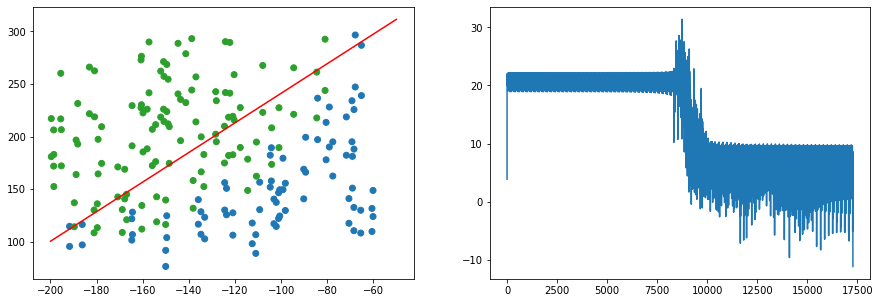

<Figure size 1152x648 with 0 Axes>

In [19]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.
my_file = open("./Binary Classification/data.txt", "r")

#count of data
content = my_file.readlines()
lines_num = len(content)

dataSet = np.zeros((lines_num, 2))
biased_data = np.zeros((lines_num, 3))
desired = np.zeros((1, lines_num))[0]

#split each line 
i = 0
for line in content:
  l = line.split(",")
  l = [float(x) for x in l]
  # np.append(dataSet, [2,3])
  biased_data[i] = [1, l[0], l[1]]
  dataSet[i] = [l[0], l[1]]
  
  #change 0 to -1 in desired
  if l[2] == 0: desired[i] = -1
  else: desired[i] = 1
  i += 1

gd = StochasticGradientDescent(biased_data, desired, 0.3, 0.00001)
error_iter = gd.iterations()
print(gd.weights)


slope = -1 * gd.weights[1] / gd.weights[2]
point = (0, -1 * gd.weights[0] / gd.weights[2])

x1 = np.linspace(-200,-50,10000)
y1 = slope * x1 - gd.weights[0] / gd.weights[2]


colors = ['#1f77b4' if d == -1 else '#2ca02c' for d in desired]
x, y = dataSet.T
x2 = np.array([err[0] for err in error_iter])
y2 = np.log([err[1] for err in error_iter])
print(x2)
print(y2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x1, y1, '-r')
ax1.scatter(x, y, c=colors)
ax2.plot(x2, y2)
plt.figure(figsize=(16, 9))

# Q4. MLP

In [20]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils 
import seaborn as sns
from keras.initializers import RandomNormal
import time

In [21]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert the 2d vector into 1d vector of 28^2
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])


# normalize the data
X_train = X_train/255
X_test = X_test/255

# encode output with one hot
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

output_dim = 10
input_dim = X_train.shape[1]
nb_epoch = 20

myMLP = Sequential()
myMLP.add(Dense(512, activation='relu', input_shape=(input_dim,)))
myMLP.add(Dense(128, activation='relu') )
myMLP.add(Dense(output_dim, activation='softmax'))

myMLP.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

history = myMLP.fit(X_train, Y_train, epochs=nb_epoch, validation_data=(X_test, Y_test))

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

loss = history.history['val_loss']
accuracy = history.history['val_accuracy']
ax.plot(x, loss, 'b', label="Validation Loss")
ax.plot(x, accuracy, 'r', label="Validation Accuracy")
plt.show()


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9620 - accuracy: 0.7535 - val_loss: 0.2967 - val_accuracy: 0.9169
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2883 - accuracy: 0.9173 - val_loss: 0.2297 - val_accuracy: 0.9339
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2274 - accuracy: 0.9345 - val_loss: 0.1931 - val_accuracy: 0.9445
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1956 - accuracy: 0.9445 - val_loss: 0.1676 - val_accuracy: 0.9509
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1601 - accuracy: 0.9541 - val_loss: 0.1539 - val_accuracy: 0.9539
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1428 - accuracy: 0.9597 - val_loss: 0.1426 - val_accuracy: 0.9579
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1258 - accuracy: 0.9650 - val_loss: 0.1232 - val_accuracy

# Q5. Back-Propagation

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.s

#implement the class with one hidden layer    
class MLP:
  def __init__(self, input_neurons, hidden_neurons, output_neurons, inputs, learning_rate):
    #neurons count
    self.input_neurons = input_neurons
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.learning_rate = learning_rate

    #input data
    self.inputs = inputs

    #initialize weights between input layer and hidden layer
    self.w = np.random.rand(self.hidden_neurons, self.input_neurons)
    self.b1 = np.random.rand(self.hidden_neurons, 1)   

    #initialize weights between hidden layer and output layer
    self.wPrime = np.random.rand(self.output_neurons, self.hidden_neurons)
    self.b2 = np.random.rand(self.output_neurons, 1)

    #errors
    self.error = []

#####################################################################################

  def E(self, y, desired): return np.multiply(0.5, np.sum(np.power(np.subtract(desired, y), 2)))
    
  #activation functions
  def sigmoid(self, x): return 1 / (1 + np.exp(np.multiply(-1, x)))

  def softmax(self, net):
      a = np.exp(net)
      b = np.sum(a)
      return np.divide(a, b)

#####################################################################################
  def forwardpass(self, data):
    net1 = np.dot(self.w, data) + self.b1
    #use sigmoid for hidden layer
    out1 = self.sigmoid(net1)    
    net2 = np.dot(self.wPrime, out1) + self.b2
    #use softmax for output layer
    out2 = self.softmax(net2)    
    return (net1, out1, net2, out2)

#####################################################################################
  #backward pass
  def deltachange(self, data, target, out2, out1):
    #weight changes for output node
    term1 = np.subtract(out2, target)
    
    #derivative of sigmoid function
    # term2 = np.multiply(out2, np.subtract(1, out2))
    #derivative of softmax function
    term2 = np.multiply(out2, np.subtract(1, out2))    
    
    term3 = out1.T
    # print("term3", term3)
    x = np.multiply(term1, term2)
    # print("x", x)
    derivative = np.dot(x, term3) #rond(E_total) / rond(w_i)
    # print("derivative", derivative)
    new_wprime =  np.subtract(self.wPrime, np.multiply(self.learning_rate, derivative))
    # print("new weight primes", new_wprime)

    #update bias weight
    #just term3 changes
    #w_i * h1 + w_j * h2 + b ---> derivative = 1
    np.subtract(self.b2, np.multiply(self.learning_rate, x), self.b2)

    ##########################################
    #weight changes for hidden node
    # print("weight", self.w)
    term11 = np.dot(self.wPrime.T, x)
    #derivative of sigmoid function
    term22 = np.multiply(out1, np.subtract(1, out1))
    term33 = data.T
    x2 = np.multiply(term11, term22)
    derivative2 = np.dot(x2, term33) #rond(E_total) / rond(w_i)
    new_w = np.subtract(self.w, np.multiply(self.learning_rate, derivative2))
    # print("new weights", new_w)

    #update bias weight
    #just term3 changes
    #w_i * 1 + w_j * i2 + b ---> derivative = 1
    np.subtract(self.b1, np.multiply(self.learning_rate, x2), self.b1)
    # print("new bias", self.b1)

    #now update weights
    self.wPrime = new_wprime
    self.w = new_w

#####################################################################################
  #calculate forward and backward on each data
  def forwardbackward(self, line):
    l = line.split(",")
    l = [int(x) for x in l]
    desired = np.zeros((10, 1))
    desired[l[0]] = 1
    #normalize data
    data = np.divide(np.array(l[1:]).reshape(784, 1), 255)
    #forward
    (net1, out1, net2, out2) = self.forwardpass(data)
    
    
    self.error.append(self.E(out2, desired))
    #backward
    self.deltachange(data, desired, out2, out1)

#####################################################################################
  def train(self):  
    for line in self.inputs:
      self.forwardbackward(line)


  def test(self, testdata):
    true = 0
    for line in testdata:
      l = line.split(",")
      l = [int(x) for x in l]
      desired = l[0]
      #normalize data
      data = np.divide(np.array(l[1:]).reshape(784, 1), 255)
      #forward
      (net1, out1, net2, out2) = self.forwardpass(data)
      
      for j in range(len(out2)):
        if out2[j] == 1:
          break
      if j == desired:
        true += 1
    return true   




In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.


my_file = open("./sample_data/mnist_train_small.csv", "r")

#count of data
content = my_file.readlines()
mlp = MLP(784, 128, 10, content, 0.3)

my_file = open("./sample_data/mnist_test.csv", "r")
#count of data
content2 = my_file.readlines()

train_errors = []
test_acc = []
#epoch = 3
mlp.train()
mse = np.sum(mlp.error) / 20000
train_errors.append(mse)
print("loss of training epoch1:", mse)

accuracy = mlp.test(content2)
test_acc.append(accuracy)
print("accuracy of test data", (accuracy / 10000))

mlp.train()
mse = np.sum(mlp.error) / 40000
train_errors.append(mse)
print("loss of training epoch2:", mse)

accuracy = mlp.test(content2)
test_acc.append(accuracy)
print("accuracy of test data", (accuracy / 10000))

mlp.train()
mse = np.sum(mlp.error) / 60000
train_errors.append(mse)
print("loss of training epoch3:", mse)

accuracy = mlp.test(content2)
test_acc.append(accuracy)
print("accuracy of test data", (accuracy / 10000))

# accuracy = mlp.test(content2)
# print("accuracy of test data", accuracy / 10000)

epoch = range(1, 4)
plt.plot(epoch, train_errors, label="train Loss")
plt.plot(epoch, test_acc, '-r')
plt.show()


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.